# PROBLEM 1
Wpływ położenia grzejnika na ogrzewanie pokoju

In [8]:
import sys
from pathlib import Path

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent
PIPELINE_DIR = PROJECT_ROOT / "pipeline"

print("Notebook:", NOTEBOOK_DIR)
print("Project root:", PROJECT_ROOT)
print("Pipeline dir:", PIPELINE_DIR)

sys.path.insert(0, str(PIPELINE_DIR))
print("Added pipeline to sys.path")

Notebook: C:\Users\kalic\PycharmProjects\modelowanie-projekt\notebooks
Project root: C:\Users\kalic\PycharmProjects\modelowanie-projekt
Pipeline dir: C:\Users\kalic\PycharmProjects\modelowanie-projekt\pipeline
Added pipeline to sys.path


In [9]:
from pipeline.MultiRoomSim import *
from pipeline.Visualizations import *
import matplotlib.pyplot as plt
import numpy as np

Opis: Tworzymy trzy pokoje z różnymi położeniami grzejnika oraz inicjalizujemy potrzebne klasy

In [10]:
room1 = Room(radiator_position='top')
room2 = Room(radiator_position='bottom')
room3 = Room(radiator_position='left')
physics = PhysicsParameters()
bc = BoundaryConditions(room1.grid, physics)

viz = Visualizer()

Opis: Tworzymy wizualizację schematów pokoju z różnymi położeniami grzejnika, ścianami i oknem

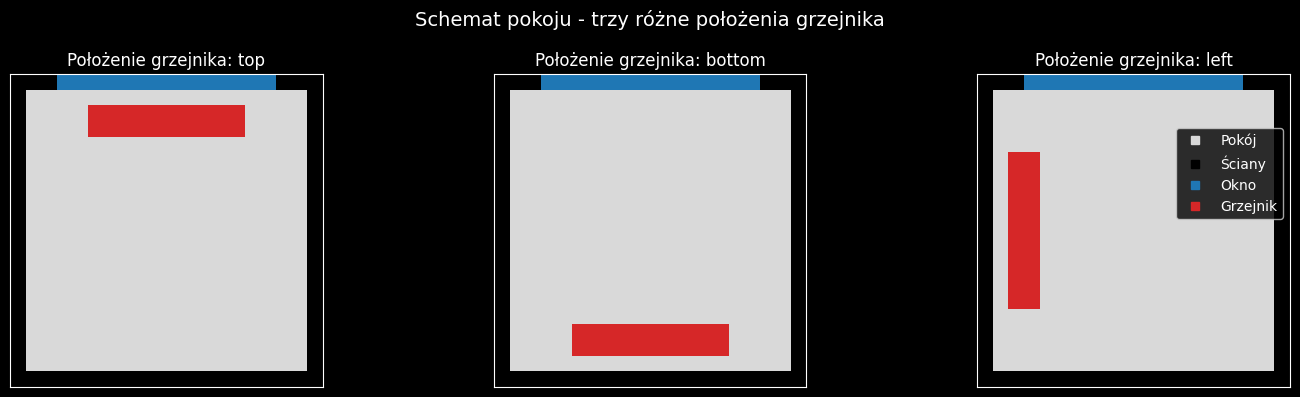

In [11]:
# ==== SCHEMATY POKOJU ====
maps = []
rooms = [room1, room2, room3]
titles = [
    f"Położenie grzejnika: {room1.radiator_mask.position}",
    f"Położenie grzejnika: {room2.radiator_mask.position}",
    f"Położenie grzejnika: {room3.radiator_mask.position}",
]

for room in rooms:
    M = viz.draw_map(
        room.grid.shape,
        room.window.mask,
        room.radiator_mask.mask,
        room.wall_mask
    )
    maps.append(M)

viz.plot(maps, titles=titles, suptitle="Schemat pokoju - trzy różne położenia grzejnika")


Opis: Obliczamy i tworzymy wizualizację rozkładu temperatury w każdym scenariuszu, zapisujemy średnią temperaturę oraz odchylenie standardowe


=== Symulacja z grzejnikiem: top ===


100%|██████████| 21600/21600 [00:31<00:00, 689.86it/s] 


Średnia temperatura: 20.10 °C
Odchylenie standardowe: 19.42 °C

=== Symulacja z grzejnikiem: bottom ===


100%|██████████| 21600/21600 [00:37<00:00, 573.92it/s] 


Średnia temperatura: 20.66 °C
Odchylenie standardowe: 19.79 °C

=== Symulacja z grzejnikiem: left ===


100%|██████████| 21600/21600 [00:28<00:00, 762.80it/s] 


Średnia temperatura: 20.17 °C
Odchylenie standardowe: 19.58 °C


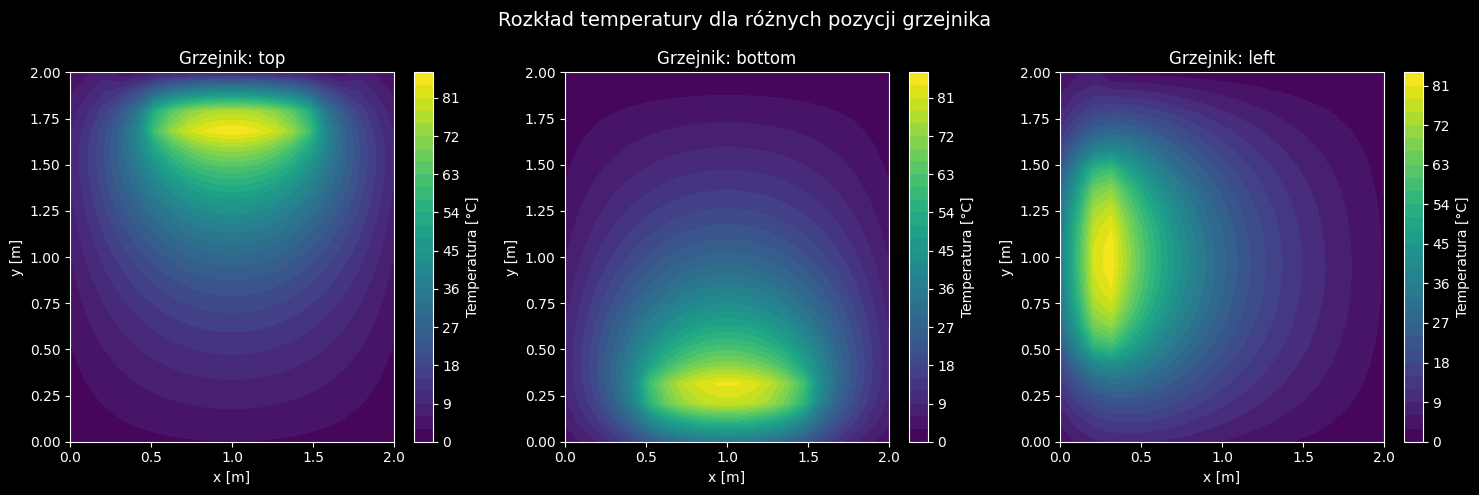

In [12]:
# ==== SYMULACJE ====
positions = ['top', 'bottom', 'left']
solutions = {}
results = {}

fig, axes = plt.subplots(1, len(positions), figsize=(5*len(positions), 5))

for idx, position in enumerate(positions):
    print(f"\n=== Symulacja z grzejnikiem: {position} ===")

    # Stworzenie pokoju z odpowiednim grzejnikiem
    room = Room(radiator_position=position)
    physics = PhysicsParameters()
    bc = BoundaryConditions(room.grid, physics)
    controller = room.controller

    solver = Solver(room.grid, room, physics, bc, controller)
    solution = solver.solve()
    solutions[position] = solution

    mean_temp = np.mean(solution - 273.0)
    std_temp = np.std(solution - 273.0)
    results[position] = {'mean_temp': mean_temp, 'std_temp': std_temp}

    # Wykres temperatury
    ax = axes[idx]
    contour = ax.contourf(room.grid.X, room.grid.Y, solution - 273.0,
                          levels=30)
    plt.colorbar(contour, ax=ax, label='Temperatura [°C]')
    ax.set_title(f"Grzejnik: {position}")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")

    print(f"Średnia temperatura: {mean_temp:.2f} °C")
    print(f"Odchylenie standardowe: {std_temp:.2f} °C")

fig.suptitle("Rozkład temperatury dla różnych pozycji grzejnika", fontsize=14)
plt.tight_layout()
plt.show()